In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
from poitousprint import Portic
portic_client = Portic()

In [112]:
#pointcalls = portic_client.get_pointcalls(year=1789, source_subset="Poitou_1789")

In [113]:
#len(pointcalls)

In [114]:
sorties = pd.read_csv("sorties_navires_vers_etranger.csv")

In [115]:
sorties_mixtes = pd.read_csv("sorties_navires_vers_etranger_mixte_DFLR_ailleurs1787.csv")
sorties = sorties_mixtes[sorties_mixtes.region_depart == "Aunis-Saintonge-Poitou"]

In [205]:
sorties_mixtes = pd.read_csv("sorties_navires_vers_etranger_mixte_DFLR_ailleurs1787.csv")
sorties_Bretagne = sorties_mixtes[sorties_mixtes.region_depart == "Bretagne"]
sorties_Guyenne = sorties_mixtes[sorties_mixtes.region_depart == "Guyenne"]
sorties_Nantes = sorties_mixtes[sorties_mixtes.amiraute_depart == "Nantes"]

In [206]:
sorties_Nantes.shape

(474, 28)

In [116]:
sorties.shape

(391, 28)

In [117]:
sorted(sorties_mixtes.columns)

['amiraute_depart',
 'captain_name',
 'commodity_standardized2_fr',
 'commodity_standardized3_fr',
 'commodity_standardized4_fr',
 'commodity_standardized_fr',
 'homeport_province',
 'homeport_state_1789_fr',
 'homeport_substate_1789_fr',
 'homeport_toponyme_fr',
 'outdate_fixed',
 'partner_balance_1789',
 'partner_balance_supp_1789',
 'pointcall_province',
 'port_depart',
 'port_destination',
 'region_depart',
 'ship_flag_standardized_fr',
 'ship_id',
 'ship_name',
 'state_destination',
 'substate_destination',
 'taxe_amount01',
 'taxe_amount02',
 'taxe_amount03',
 'tonnage',
 'tonnage_class',
 'tonnage_unit']

In [118]:
len(sorties)

391

In [119]:
sorties["homeport_state_1789_fr"] = sorties.homeport_state_1789_fr.str.replace("Duché de Mecklenbourg", "Mecklenbourg")

<ipython-input-119-19f52f823b23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorties["homeport_state_1789_fr"] = sorties.homeport_state_1789_fr.str.replace("Duché de Mecklenbourg", "Mecklenbourg")


In [120]:
len(sorties[sorties.homeport_state_1789_fr.isna()])

28

In [121]:
sorties[sorties.homeport_state_1789_fr.isna()].sample(5)

,region_depart,amiraute_depart,port_depart,outdate_fixed,port_destination,partner_balance_1789,partner_balance_supp_1789,pointcall_province,substate_destination,state_destination,...,commodity_standardized2_fr,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr
392,Aunis-Saintonge-Poitou,La Rochelle,Ars-en-Ré,1789-02-22,Penzance,Angleterre,Etranger,NaN,Angleterre,Grande-Bretagne,...,NaN,NaN,NaN,480,0,0,150.0,tx,[101-200],britannique
1514,Aunis-Saintonge-Poitou,La Rochelle,La Rochelle,1789-09-01,Amsterdam,Hollande,Etranger,NaN,Hollande,Provinces-Unies,...,NaN,NaN,NaN,480,0,0,110.0,tx,[101-200],hollandais
1370,Aunis-Saintonge-Poitou,La Rochelle,Saint-Martin-de-Ré,1789-06-26,Biscaye,Espagne,Etranger,NaN,NaN,Espagne,...,NaN,NaN,NaN,1 800,0,0,45.0,tx,[21-50],NaN
6624,Aunis-Saintonge-Poitou,La Rochelle,La Rochelle,1789-03-16,Stettin,Prusse,Etranger,NaN,NaN,Prusse,...,NaN,NaN,NaN,480,0,0,150.0,tx,[101-200],meckelmbourgeois
1207,Aunis-Saintonge-Poitou,La Rochelle,Ars-en-Ré,1789-05-20,Amsterdam,Hollande,Etranger,NaN,Hollande,Provinces-Unies,...,NaN,NaN,NaN,480,0,0,80.0,tx,[51-100],hollandais


In [122]:
flag_to_homestate = {"britannique": "Grande-Bretagne",
                    "français": "France",
                     "danois": "Danemark",
                     "hollandais": "Provinces-Unies",
                     "étasunien": "Etats-Unis d'Amérique",
                     "prussien": "Prusse",
                     "lubeckois": "Lubeck",
                     "polonais": "Pologne",
                     "hambourgeois": "Hambourg",
                     "brémois": "Brême",
                     "meckelmbourgeois": "Mecklenbourg",
                     "oldenbourgeois": "Duché d'Oldenbourg",
                     "papenbourgeois": "Prusse"
                    }

In [123]:
sorties[sorties.homeport_state_1789_fr.isna()][["homeport_state_1789_fr", "ship_flag_standardized_fr"]].sample(5)

,homeport_state_1789_fr,ship_flag_standardized_fr
1514,NaN,hollandais
4303,NaN,NaN
6450,NaN,papenbourgeois
4897,NaN,NaN
7859,NaN,hollandais


In [124]:
sorties["flag"] = sorties.ship_flag_standardized_fr.map(flag_to_homestate)

<ipython-input-124-872c12fa1f63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorties["flag"] = sorties.ship_flag_standardized_fr.map(flag_to_homestate)


In [125]:
sorties[["homeport_state_1789_fr", "ship_flag_standardized_fr", "flag"]].sample(5)

,homeport_state_1789_fr,ship_flag_standardized_fr,flag
3242,Lubeck,lubeckois,Lubeck
3699,Danemark,danois,Danemark
7824,Grande-Bretagne,britannique,Grande-Bretagne
6053,Danemark,danois,Danemark
4365,France,français,France


In [126]:
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna(sorties.flag)
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna("Non renseigné")

<ipython-input-126-632a96a63334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna(sorties.flag)
<ipython-input-126-632a96a63334>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna("Non renseigné")


In [127]:
sorties.homeport_state_1789_fr.value_counts()

Grande-Bretagne          123
France                    78
Danemark                  54
Provinces-Unies           44
Etats-Unis d'Amérique     25
Prusse                    23
Lubeck                     8
Non renseigné              8
Hambourg                   7
Pologne                    7
Brême                      5
Mecklenbourg               4
Espagne                    3
Duché d'Oldenbourg         2
Name: homeport_state_1789_fr, dtype: int64

In [128]:
sorties.state_destination.value_counts()

Grande-Bretagne          111
zone maritime             64
Danemark                  52
Provinces-Unies           41
Etats-Unis d'Amérique     26
Prusse                    20
Autriche                  16
Espagne                   14
multi-Etat                11
Lubeck                     9
Hambourg                   7
Portugal                   6
Brême                      6
Pologne                    5
Russie                     2
Mecklenbourg               1
Name: state_destination, dtype: int64

In [129]:
sorties[sorties.state_destination.isna()]

,region_depart,amiraute_depart,port_depart,outdate_fixed,port_destination,partner_balance_1789,partner_balance_supp_1789,pointcall_province,substate_destination,state_destination,...,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr,flag


In [130]:
sorties.substate_destination.value_counts()

Angleterre                          91
Norvège                             51
Hollande                            34
Pays-Bas autrichiens                16
Massachussets                       16
Irlande                              7
Iles anglo-normandes                 6
Frise                                5
Ecosse                               4
Maryland                             4
îles atlantiques portugaises         2
Virginie                             2
colonies portugaises d'Afrique       2
Zélande                              2
colonies britanniques d'Amérique     2
Pennsylvanie                         2
Rhode Island                         1
New York                             1
Pays de Galles                       1
Name: substate_destination, dtype: int64

In [133]:
sorties[sorties.substate_destination.isna()]

,region_depart,amiraute_depart,port_depart,outdate_fixed,port_destination,partner_balance_1789,partner_balance_supp_1789,pointcall_province,substate_destination,state_destination,...,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr,flag
84,Aunis-Saintonge-Poitou,Sables-d’Olonne,Les Sables-d'Olonne,1789-08-03,Grands Bancs de Terre-Neuve,NaN,Etranger,NaN,NaN,zone maritime,...,Vivres,Vivres,1 800,0,0,100.0,tx,[51-100],français,France
96,Aunis-Saintonge-Poitou,La Rochelle,La Rochelle,1789-04-10,Brême,Quatre villes hanséatiques,Etranger,NaN,NaN,Brême,...,NaN,NaN,480,0,0,130.0,tx,[101-200],brémois,Brême
237,Aunis-Saintonge-Poitou,Sables-d’Olonne,Noirmoutier,1789-08-10,Königsberg / Kaliningrad,Prusse,Etranger,NaN,NaN,Prusse,...,NaN,NaN,480,0,0,190.0,tx,[101-200],prussien,Prusse
244,Aunis-Saintonge-Poitou,Sables-d’Olonne,Les Sables-d'Olonne,1789-02-19,Grands Bancs de Terre-Neuve,NaN,Etranger,NaN,NaN,zone maritime,...,Vivres,Vivres,1 800,0,0,130.0,tx,[101-200],français,France
336,Aunis-Saintonge-Poitou,La Rochelle,Ars-en-Ré,1789-04-30,Mer Baltique,NaN,Etranger,NaN,NaN,zone maritime,...,NaN,NaN,480,0,0,130.0,tx,[101-200],hollandais,Provinces-Unies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,Aunis-Saintonge-Poitou,Sables-d’Olonne,Les Sables-d'Olonne,1789-02-17,Grands Bancs de Terre-Neuve,NaN,Etranger,NaN,NaN,zone maritime,...,Vivres,Vivres,1 800,0,0,130.0,tx,[101-200],français,France
8787,Aunis-Saintonge-Poitou,Sables-d’Olonne,Noirmoutier,1789-11-09,Mer Baltique,NaN,Etranger,NaN,NaN,zone maritime,...,NaN,NaN,480,0,0,200.0,tx,[101-200],prussien,Prusse
9024,Aunis-Saintonge-Poitou,Sables-d’Olonne,Noirmoutier,1789-07-07,Königsberg / Kaliningrad,Prusse,Etranger,NaN,NaN,Prusse,...,NaN,NaN,480,0,0,150.0,tx,[101-200],prussien,Prusse
9040,Aunis-Saintonge-Poitou,La Rochelle,La Rochelle,1789-04-23,Brême,Quatre villes hanséatiques,Etranger,NaN,NaN,Brême,...,NaN,NaN,480,0,0,90.0,tx,[51-100],brémois,Brême


In [134]:
sorties["destination"] = sorties["substate_destination"].fillna(sorties["state_destination"])

<ipython-input-134-1fb69e4749ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorties["destination"] = sorties["substate_destination"].fillna(sorties["state_destination"])


In [138]:
sorties.destination.value_counts()

Angleterre                          91
zone maritime                       64
Norvège                             51
Hollande                            34
Prusse                              20
Pays-Bas autrichiens                16
Massachussets                       16
Espagne                             14
multi-Etat                          11
Lubeck                               9
Irlande                              7
Hambourg                             7
Brême                                6
Iles anglo-normandes                 6
Frise                                5
Pologne                              5
Maryland                             4
Ecosse                               4
îles atlantiques portugaises         2
colonies portugaises d'Afrique       2
Zélande                              2
Virginie                             2
colonies britanniques d'Amérique     2
Russie                               2
Portugal                             2
Pennsylvanie             

In [139]:
sorties.homeport_province.value_counts()

Poitou       31
Aunis        24
Bretagne     10
Normandie     6
Saintonge     3
Guyenne       3
Picardie      1
Name: homeport_province, dtype: int64

In [140]:
sorties["outside_DFLR"] = (
    (sorties["homeport_state_1789_fr"] != "France") | 
    (~sorties["homeport_province"].isin(["Aunis", "Poitou", "Saintonge"])))

<ipython-input-140-3a54856beea8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorties["outside_DFLR"] = (


In [141]:
sorties["Port d'attache"] = sorties["outside_DFLR"].map({True: "autres", False: "Aunis, Poitou, Saintonge"})

<ipython-input-141-d70180b2265d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorties["Port d'attache"] = sorties["outside_DFLR"].map({True: "autres", False: "Aunis, Poitou, Saintonge"})


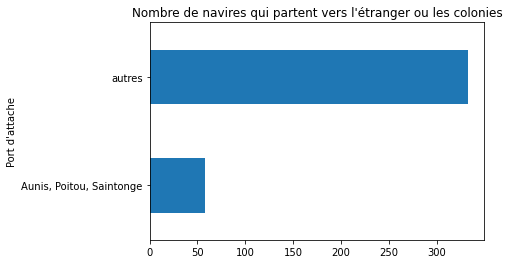

In [142]:
(sorties.groupby("Port d'attache").size()).plot.barh()
plt.title("Nombre de navires qui partent vers l'étranger ou les colonies")
plt.show()

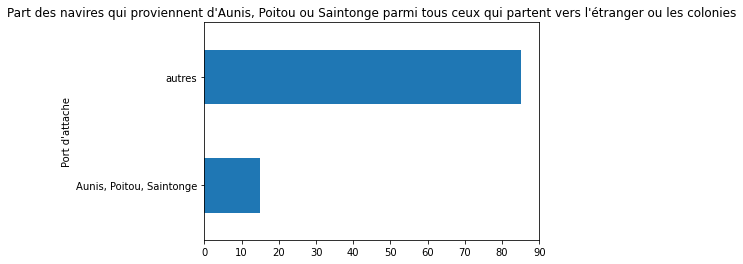

In [143]:
(sorties.groupby("Port d'attache").size()*100/len(sorties)).plot.barh()
plt.xticks(np.arange(0, 100, 10))
plt.title("Part des navires qui proviennent d'Aunis, Poitou ou Saintonge parmi tous ceux qui partent vers l'étranger ou les colonies")
plt.show()

In [144]:
sorties["commodity_standardized_fr"] = sorties["commodity_standardized_fr"].fillna("")

<ipython-input-144-f40f697752d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorties["commodity_standardized_fr"] = sorties["commodity_standardized_fr"].fillna("")


In [145]:
colonies = pd.read_csv("sorties_navires_vers_colonies.csv")

In [146]:
colonies

,record_id,ship_id,ship_name,captain_name,port_depart,outdate_fixed,port_destination,substate_destination,state_destination,homeport_state_1789_fr,...,commodity_standardized2_fr,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr
0,342065,0021420N,Bon Père,"Levasseur, Charle Philippe",La Rochelle,1789-04-06,Côte d'Angole,colonies portugaises d'Afrique,Portugal,France,...,NaN,NaN,NaN,1 800,0,0,584,tx,[501 et plus],français
1,340973,NaN,Huranien,"Hardouin, Etienne",La Rochelle,1789-02-13,Martinique,colonies françaises d'Amérique,France,France,...,NaN,NaN,NaN,1 800,0,0,400,tx,[201-500],français
2,341638,NaN,Méridien,"Lemic, Denis",La Rochelle,1789-06-27,Côte d'Or,NaN,multi-Etat,France,...,NaN,NaN,NaN,1 800,0,0,92,tx,[51-100],français
3,336804,NaN,Espérance,"Bertrand, Jacques",Rochefort,1789-01-01,Côte d'Angole,colonies portugaises d'Afrique,Portugal,France,...,NaN,NaN,NaN,1 800,0,0,614,tx,[501 et plus],français
4,341461,NaN,Henri Quatre,"Gouin, Honoré Alexandre",La Rochelle,1789-05-09,île de France / île Maurice,colonies françaises en Asie,France,France,...,NaN,NaN,NaN,1 800,0,0,500,tx,[201-500],français
5,341461,NaN,Henri Quatre,"Gouin, Honoré Alexandre",La Rochelle,1789-05-09,île Bourbon / île de la Réunion,colonies françaises en Asie,France,France,...,NaN,NaN,NaN,1 800,0,0,500,tx,[201-500],français
6,341642,NaN,Deux Amis,"Villeneau, Pierre",La Rochelle,1789-11-20,Côte d'Or,NaN,multi-Etat,France,...,NaN,NaN,NaN,14 400,0,0,402,tx,[201-500],français
7,341645,NaN,Angelique,"Pariés, Dominique",Ars-en-Ré,1789-08-06,colonies anglaises [en Amérique],colonies britanniques d'Amérique,Grande-Bretagne,France,...,NaN,NaN,NaN,1 800,0,0,210,tx,[201-500],français
8,341419,NaN,Jeune Armand,"Noel, Nicolas",La Rochelle,1789-07-11,Saint-Pierre-et-Miquelon,colonies françaises d'Amérique,France,France,...,NaN,NaN,NaN,1 800,0,0,210,tx,[201-500],français
9,341480,NaN,Duc de Saint Aignan,"La Brière, Sébastien Giot",La Rochelle,1789-07-06,Calabar,NaN,NaN,France,...,NaN,NaN,NaN,1 800,0,0,369,tx,[201-500],français


In [147]:
colonies["commodity_standardized_fr"] = colonies["commodity_standardized_fr"].fillna("")

In [148]:
colonies["vers_colonies"] = (
    colonies.substate_destination.str.startswith("colonie") & 
    (~colonies.commodity_standardized_fr.str.startswith("Pêche")) &
    (~colonies.port_destination.str.startswith("Saint-Pierre-et-Miquelon")) &
    (~colonies.port_destination.str.startswith("Terre-Neuve"))

)

In [149]:
colonies

,record_id,ship_id,ship_name,captain_name,port_depart,outdate_fixed,port_destination,substate_destination,state_destination,homeport_state_1789_fr,...,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr,vers_colonies
0,342065,0021420N,Bon Père,"Levasseur, Charle Philippe",La Rochelle,1789-04-06,Côte d'Angole,colonies portugaises d'Afrique,Portugal,France,...,NaN,NaN,1 800,0,0,584,tx,[501 et plus],français,True
1,340973,NaN,Huranien,"Hardouin, Etienne",La Rochelle,1789-02-13,Martinique,colonies françaises d'Amérique,France,France,...,NaN,NaN,1 800,0,0,400,tx,[201-500],français,True
2,341638,NaN,Méridien,"Lemic, Denis",La Rochelle,1789-06-27,Côte d'Or,NaN,multi-Etat,France,...,NaN,NaN,1 800,0,0,92,tx,[51-100],français,False
3,336804,NaN,Espérance,"Bertrand, Jacques",Rochefort,1789-01-01,Côte d'Angole,colonies portugaises d'Afrique,Portugal,France,...,NaN,NaN,1 800,0,0,614,tx,[501 et plus],français,True
4,341461,NaN,Henri Quatre,"Gouin, Honoré Alexandre",La Rochelle,1789-05-09,île de France / île Maurice,colonies françaises en Asie,France,France,...,NaN,NaN,1 800,0,0,500,tx,[201-500],français,True
5,341461,NaN,Henri Quatre,"Gouin, Honoré Alexandre",La Rochelle,1789-05-09,île Bourbon / île de la Réunion,colonies françaises en Asie,France,France,...,NaN,NaN,1 800,0,0,500,tx,[201-500],français,True
6,341642,NaN,Deux Amis,"Villeneau, Pierre",La Rochelle,1789-11-20,Côte d'Or,NaN,multi-Etat,France,...,NaN,NaN,14 400,0,0,402,tx,[201-500],français,False
7,341645,NaN,Angelique,"Pariés, Dominique",Ars-en-Ré,1789-08-06,colonies anglaises [en Amérique],colonies britanniques d'Amérique,Grande-Bretagne,France,...,NaN,NaN,1 800,0,0,210,tx,[201-500],français,True
8,341419,NaN,Jeune Armand,"Noel, Nicolas",La Rochelle,1789-07-11,Saint-Pierre-et-Miquelon,colonies françaises d'Amérique,France,France,...,NaN,NaN,1 800,0,0,210,tx,[201-500],français,False
9,341480,NaN,Duc de Saint Aignan,"La Brière, Sébastien Giot",La Rochelle,1789-07-06,Calabar,NaN,NaN,France,...,NaN,NaN,1 800,0,0,369,tx,[201-500],français,False


In [150]:
(colonies[.groupby("Port d'attache").size()).plot.barh()
plt.title("Nombre de navires qui partent vers l'étranger ou les colonies")
plt.show()

SyntaxError: invalid syntax (<ipython-input-150-35c786506ce6>, line 1)

In [151]:
colonies[colonies.vers_colonies == True][["port_depart", "outdate_fixed", "port_destination", "homeport_province", "substate_destination", "commodity_standardized_fr", "tonnage", "tonnage_unit", "tonnage_class"]]

,port_depart,outdate_fixed,port_destination,homeport_province,substate_destination,commodity_standardized_fr,tonnage,tonnage_unit,tonnage_class
0,La Rochelle,1789-04-06,Côte d'Angole,Aunis,colonies portugaises d'Afrique,,584,tx,[501 et plus]
1,La Rochelle,1789-02-13,Martinique,Aunis,colonies françaises d'Amérique,,400,tx,[201-500]
3,Rochefort,1789-01-01,Côte d'Angole,Aunis,colonies portugaises d'Afrique,Marchandises permises,614,tx,[501 et plus]
4,La Rochelle,1789-05-09,île de France / île Maurice,Aunis,colonies françaises en Asie,,500,tx,[201-500]
5,La Rochelle,1789-05-09,île Bourbon / île de la Réunion,Aunis,colonies françaises en Asie,,500,tx,[201-500]
7,Ars-en-Ré,1789-08-06,colonies anglaises [en Amérique],Guyenne,colonies britanniques d'Amérique,,210,tx,[201-500]
17,La Rochelle,1789-12-02,Gonaïves,Aunis,colonies françaises d'Amérique,,240,tx,[201-500]
19,La Rochelle,1789-08-06,Cap-Français,Aunis,colonies françaises d'Amérique,,250,tx,[201-500]
26,Rochefort,1789-03-07,Cap-Français,Aunis,colonies françaises d'Amérique,Poudre à canon,160,tx,[101-200]
27,Ars-en-Ré,1789-04-21,Colonies françaises en Amérique,Bretagne,colonies françaises d'Amérique,Sel,70,tx,[51-100]


In [155]:
ax = sns.countplot(x="vers_colonies", data=sorties)

ValueError: Could not interpret input 'vers_colonies'

In [156]:
noDFLR = sorties[(sorties.outside_DFLR == True)]

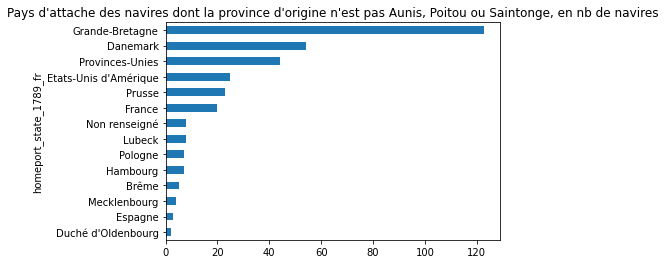

In [157]:
nb_pointcalls = noDFLR.groupby("homeport_state_1789_fr").size()
nb_pointcalls.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

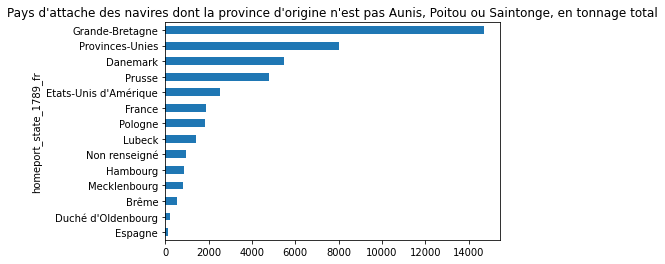

In [158]:
tonnage = noDFLR.groupby("homeport_state_1789_fr")["tonnage"].sum()
tonnage.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonnage total")
plt.show()

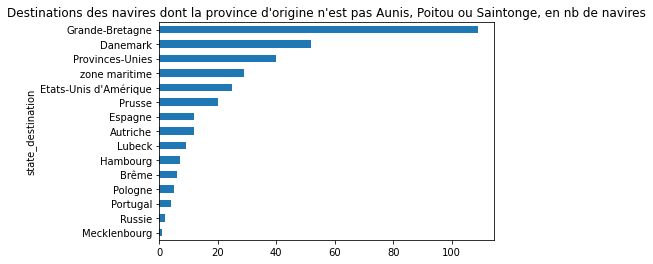

In [159]:
destination = noDFLR.groupby("state_destination").size()
destination.sort_values().plot.barh()
plt.title(
    "Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

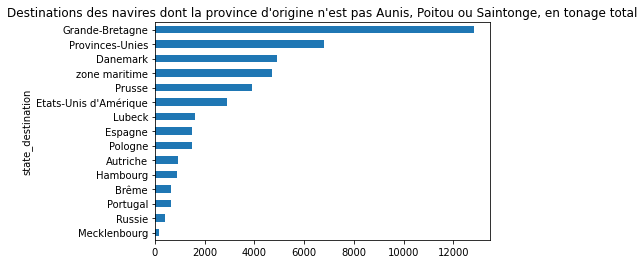

In [160]:
noDFLR.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonnage total")
plt.show()

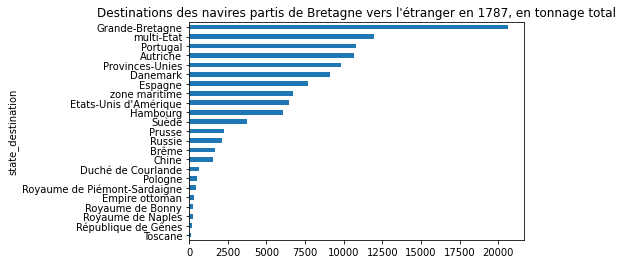

In [202]:
sorties_Bretagne.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires partis de Bretagne vers l'étranger en 1787, en tonnage total")
plt.show()

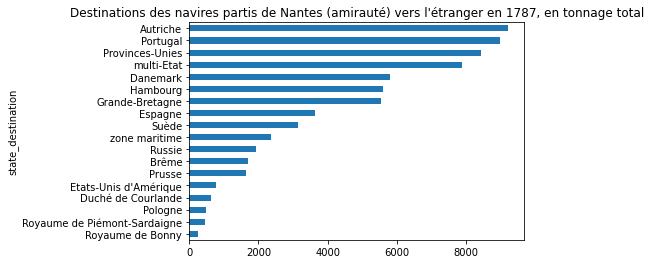

In [208]:
sorties_Nantes.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires partis de Nantes (amirauté) vers l'étranger en 1787, en tonnage total")
plt.show()

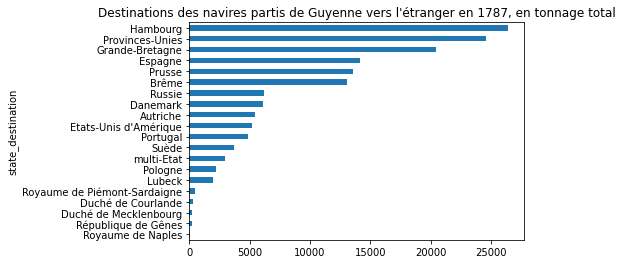

In [204]:
sorties_Guyenne.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires partis de Guyenne vers l'étranger en 1787, en tonnage total")
plt.show()

<AxesSubplot:xlabel='count', ylabel='state_destination'>

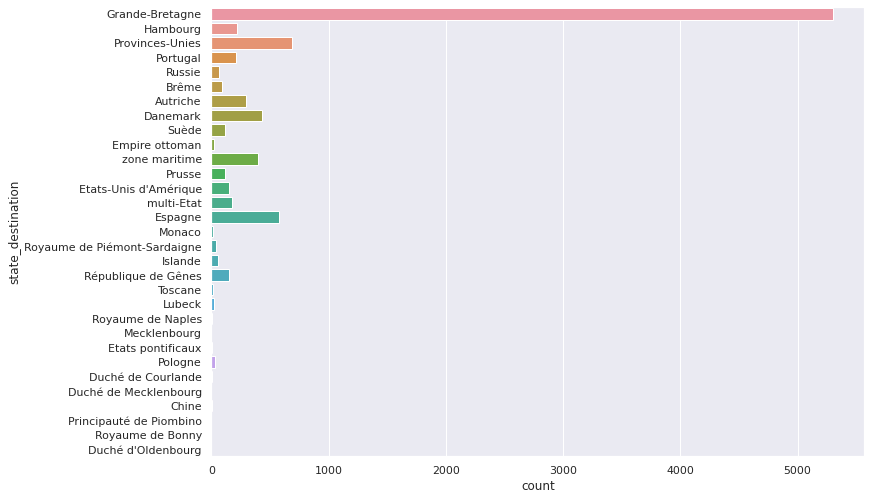

In [219]:
sns.countplot(data=sorties_mixtes, y="state_destination")

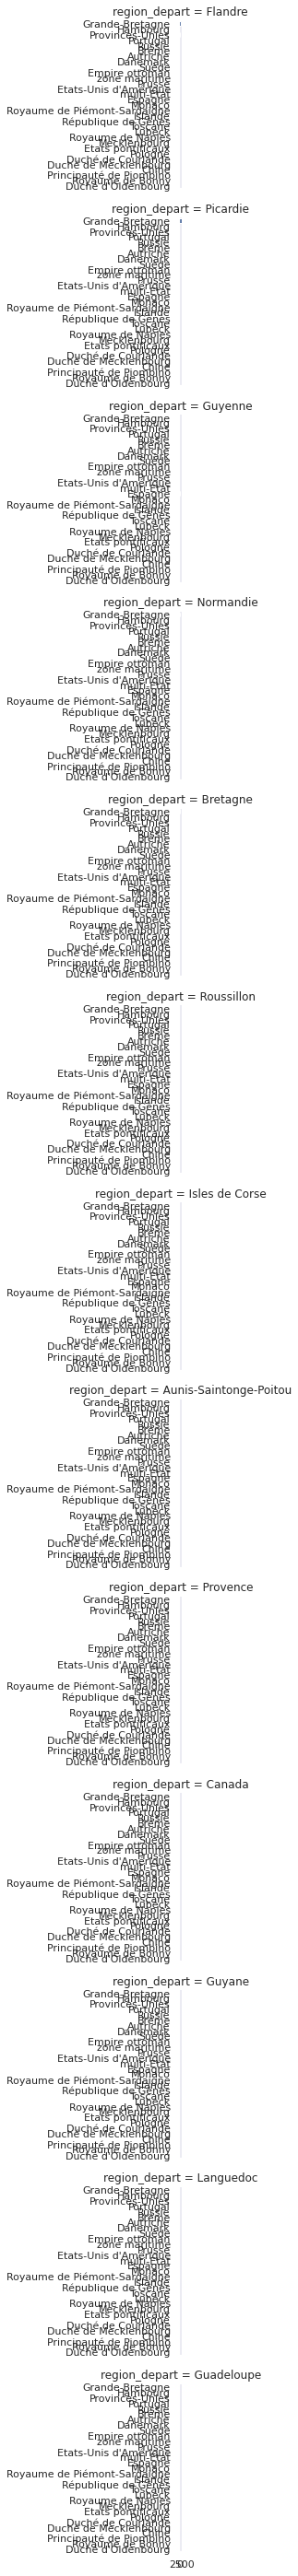

In [221]:
g = sns.FacetGrid(sorties_mixtes, row="region_depart")
g.map_dataframe(sns.countplot, y="state_destination", order=sorties_mixtes.state_destination.unique())
#g.set_axis_labels("Total bill", "Tip")
#g.add_legend()

In [ ]:
VegaLite({
  "facet": {"row": {"field": "region_depart"}},
  "spec": {
    "mark": "bar",
    "encoding": {
      "x": {
        "bin": {"maxbins": 15},
        "field": "Horsepower",
        "type": "quantitative"
      },
      "y": {"aggregate": "count", "type": "quantitative"}
        
    }
  }
}, sorties_mixtes)

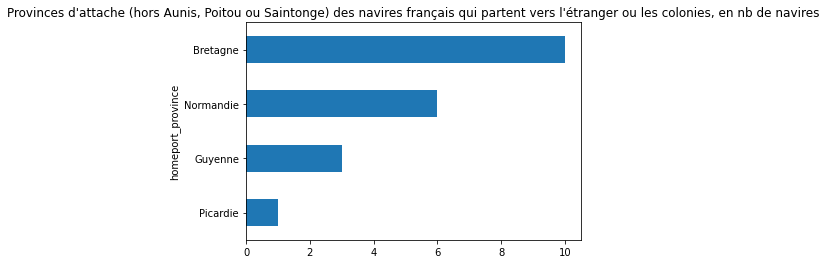

In [161]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province").size()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en nb de navires")
plt.show()

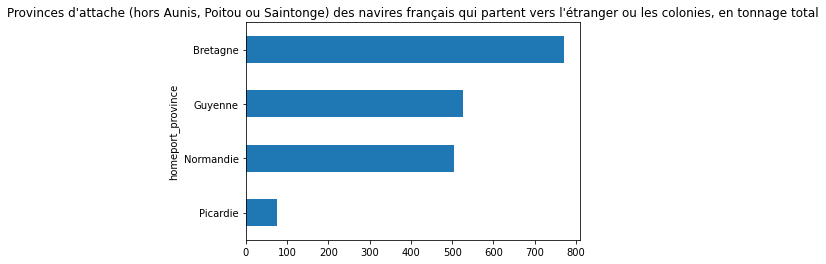

In [162]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].sum()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en tonnage total")
plt.show()

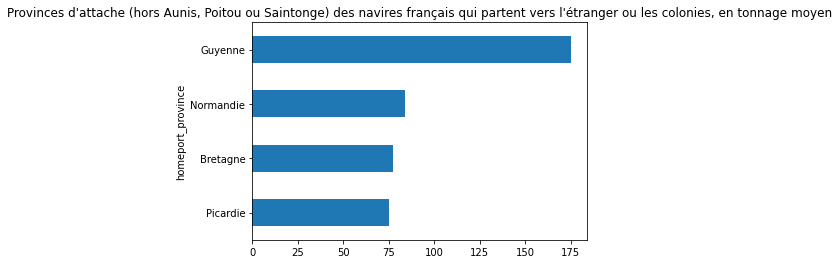

In [163]:
noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].mean().sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en tonnage moyen")
plt.show()

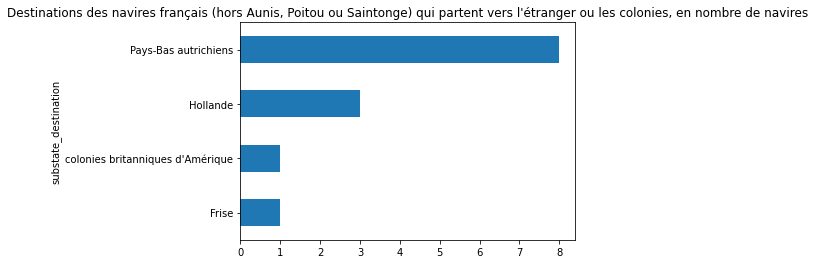

In [164]:
noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("substate_destination").size().sort_values().plot.barh()
plt.title("Destinations des navires français (hors Aunis, Poitou ou Saintonge) qui partent vers l'étranger ou les colonies, en nombre de navires")
plt.show()

<img src="mon_image.png">

In [165]:
from IPython.core.display import SVG
SVG(filename=‘path_to_fichier.svg')

SyntaxError: invalid character in identifier (<ipython-input-165-49b8922d13ff>, line 2)

## Focus sur la Grande-Bretagne

In [271]:
gb = sorties[sorties.state_destination == "Grande-Bretagne"]

In [272]:
gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna(gb["homeport_province"])
gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna("Grande-Bretagne, province absente")

<ipython-input-272-1feb56607760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna(gb["homeport_province"])
<ipython-input-272-1feb56607760>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna("Grande-Bretagne, province absente")


In [273]:
len(gb)

111

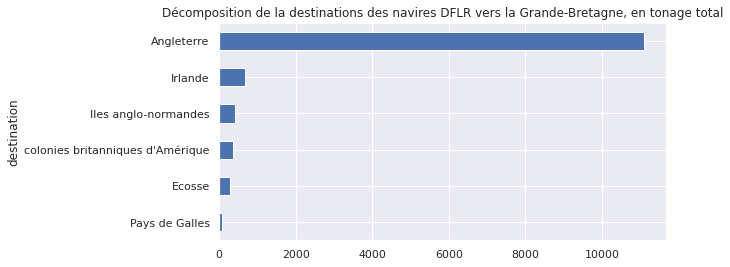

In [274]:
sns.set(rc={'figure.figsize':(8,4)})
gb.groupby("destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Décomposition de la destinations des navires DFLR vers la Grande-Bretagne, en tonage total")
plt.show()

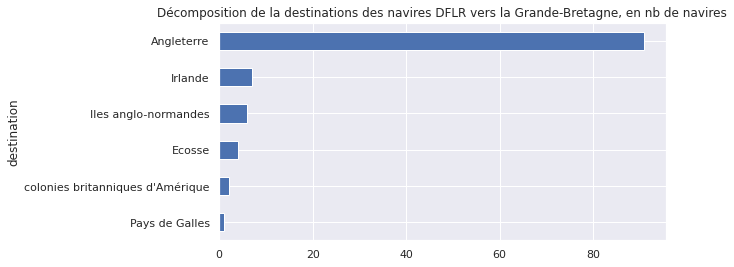

In [275]:
gb.groupby("destination").size().sort_values().plot.barh()
plt.title(
    "Décomposition de la destinations des navires DFLR vers la Grande-Bretagne, en nb de navires")
plt.show()

In [276]:
from vega import VegaLite

In [277]:
gb.columns

Index(['region_depart', 'amiraute_depart', 'port_depart', 'outdate_fixed',
       'port_destination', 'partner_balance_1789', 'partner_balance_supp_1789',
       'pointcall_province', 'substate_destination', 'state_destination',
       'ship_id', 'ship_name', 'captain_name', 'homeport_state_1789_fr',
       'homeport_substate_1789_fr', 'homeport_toponyme_fr',
       'homeport_province', 'commodity_standardized_fr',
       'commodity_standardized2_fr', 'commodity_standardized3_fr',
       'commodity_standardized4_fr', 'taxe_amount01', 'taxe_amount02',
       'taxe_amount03', 'tonnage', 'tonnage_unit', 'tonnage_class',
       'ship_flag_standardized_fr', 'flag', 'destination', 'outside_DFLR',
       'Port d'attache'],
      dtype='object')

In [278]:
gb[gb.homeport_substate_1789_fr.isna()][["homeport_province", "homeport_state_1789_fr", "ship_flag_standardized_fr"]]

,homeport_province,homeport_state_1789_fr,ship_flag_standardized_fr


In [279]:
gb["count"] = 1

<ipython-input-279-8f8b0efb5efd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb["count"] = 1


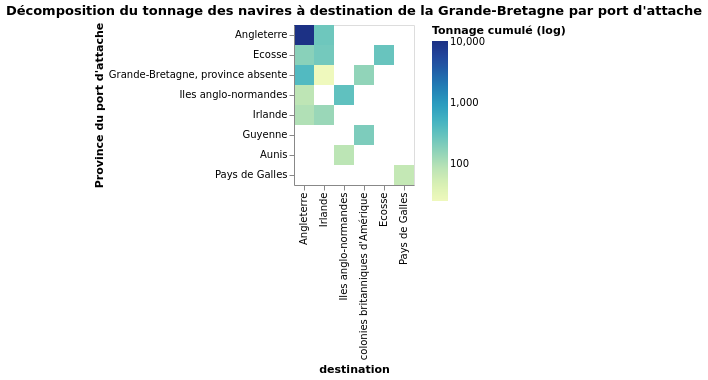

In [294]:
VegaLite({
    "title": "Décomposition du tonnage des navires à destination de la Grande-Bretagne par port d'attache",
    "mark": "rect",
    "encoding": {
        "x": {
            "type": "nominal", 
            "field": "destination",
            "title": "destination",
            "sort": "-color"
        },
        "y": {
            "field": "homeport_substate_1789_fr",
            "type": "nominal",
            "title": "Province du port d'attache",
            "sort": "-color"
        },
        "color": {
            "type": "quantitative",
            "aggregate": "sum",
            "field": "tonnage",
            "title": "Tonnage cumulé (log)",
            "scale": {
                "type": "log"
            }
        }
    }
}, gb)

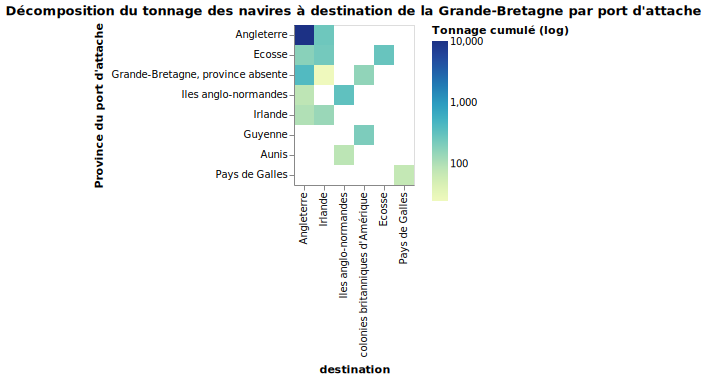

In [295]:
from IPython.core.display import SVG
SVG(filename="assets/GB_par_port_dattache.svg")

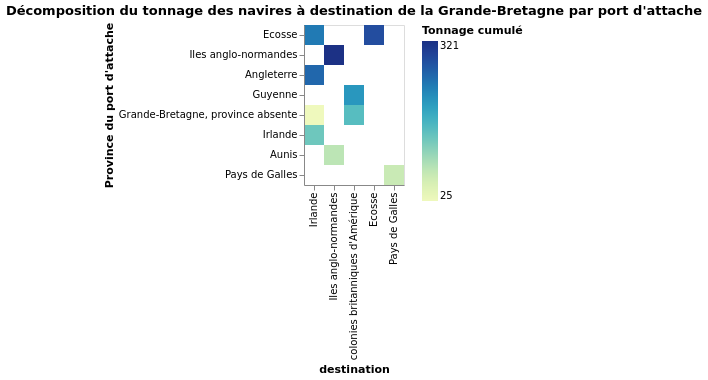

In [285]:
VegaLite({
    "title": "Décomposition du tonnage des navires à destination de la Grande-Bretagne par port d'attache",
    "mark": "rect",
    "encoding": {
        "x": {
            "type": "nominal", 
            "field": "destination",
            "title": "destination",
            "sort": "-color"
        },
        "y": {
            "field": "homeport_substate_1789_fr",
            "type": "nominal",
            "title": "Province du port d'attache",
            "sort": "-color"
        },
        "color": {
            "type": "quantitative",
            "aggregate": "sum",
            "field": "tonnage",
            "title": "Tonnage cumulé"
        }
    }
}, gb[gb.destination != "Angleterre"])

In [ ]:
# Remplacer Grande-Bretagne par Grande-Bretagne (province inconnue)

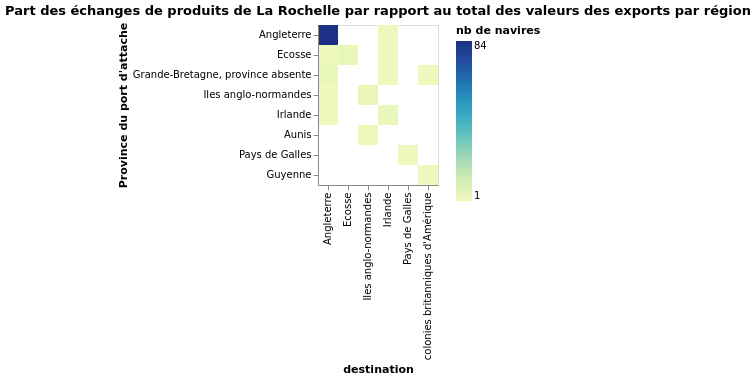

In [286]:
VegaLite({
    "title": "Part des échanges de produits de La Rochelle par rapport au total des valeurs des exports par région",
    "mark": "rect",
    "encoding": {
        "x": {
            "type": "nominal", 
            "field": "destination",
            "title": "destination"
        },
        "y": {
            "field": "homeport_substate_1789_fr",
            "type": "nominal",
            "title": "Province du port d'attache",
            "sort": "-color"
        },
        "color": {
            "type": "quantitative",
            "aggregate": "sum",
            "field": "count",
            "title": "nb de navires"
        }
    }
}, gb)

In [ ]:
gb["homeport_toponyme_fr"].value_counts()